# Dynamic network analysis
This is a brief single-notebook tutorial for dynamic gene regulatory network analysis. For extra details, see other notebooks in the same folder.
## Configuration

In [1]:
# Configure matplotlib to enable large animations
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
import matplotlib.pyplot as plt
# Download network data from zenodo
!cd ../.. && dictys_helper repodown.sh zenodo analysis-blood.tar.xz


## Load data

In [2]:
import dictys
from dictys.net import dynamic_network

d0=dynamic_network.from_file('../../data/dynamic.h5')


## TF discovery based on 4 patterns of highly variable regulatory activity over developmental trajectory ([discovery.ipynb](discovery.ipynb))

Monocyte


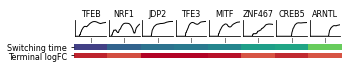

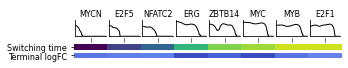

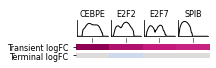

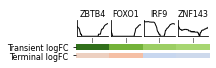

Erythroid


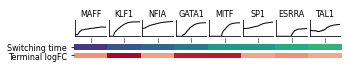

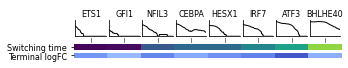

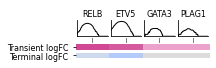

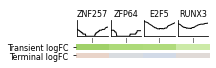

B


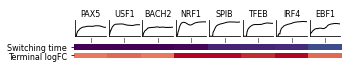

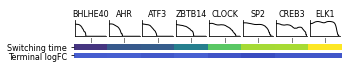

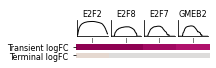

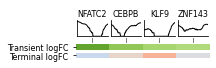

In [3]:
#Trajectory branch defined as (starting node, ending node) from trajectory inference
#See example trajectory-blood
branches={
	'Monocyte':(0,1),
	'Erythroid':(0,2),
	'B':(0,3),
}
#Value range for coloring
vrange={
	'Terminal logFC':[-9,9],
	'Transient logFC':[-3.5,3.5],
	'Switching time':[0.15,0.85],
}

for branchname in branches:
	print(branchname)
	figs=d0.draw_discover(*branches[branchname],vrange=vrange)
	plt.show()


### Colorbar

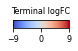

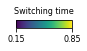

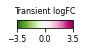

In [4]:
from operator import or_
from functools import reduce
from dictys.plot import colorbar

#Color bar font size
fs=8

colormaps=reduce(or_,[x[2] for x in figs])
for xi0 in range(len(colormaps)):
	xi=list(colormaps)[xi0]
	colormap=colormaps[xi]
	ans2=colorbar(colormap.cmap.name,colormap.norm.vmin,colormap.norm.vmax,orientation='horizontal',figsize=(1,0.15),title=xi,title_fontsize=fs)
	xticks=[colormap.norm.vmin,0,colormap.norm.vmax] if colormap.norm.vmin*colormap.norm.vmax<0 else [colormap.norm.vmin,colormap.norm.vmax]
	ans2[1].set_xticks(xticks)
	ans2[1].tick_params(axis='x',labelsize=fs)


## Animation visualization of dynamic networks
### Animation layout

Here we use the 'notch' layout. Each row for c,d,e,f has their own set of select TFs. The layout is arbitrary and you can design your own custom layout.

```
+---+       +---+
| a |       | b |
+---+---+---+---+
| c | d | e | f |
+---+---+---+---+
| c | d | e | f |
+---+---+---+---+
```

* a: Dynamic tracking of cells used for GRN inference
* b: Dynamic scatter plot for differential regulation v.s. differential expression logFCs
* c: Dynamic plot for expression level (log CPM) of select TFs as a function of pseudo-time
* d: Dynamic plot for regulatory activity (log target count) of select TFs as a function of pseudo-time
* e: Dynamic heatmap for regulation strength from select TFs to select target genes
* f: Dynamic subnetwork graph from select TF to its targets

### Branch independent parameters

In [5]:
from dictys.plot import layout,panel
# Number of frames (interpolated time points), use 100 or higher for finer resolution
nframe=100
# Animation FPS for saving. Determines speed of play
fps=0.10*nframe
# DPI for animation
dpi=100


### Erythroid branch
#### Branch dependent customizations

In [6]:
branchname='Erythroid'
# Select TFs for each row's dynamic subnetwork graph
tfs_subnet=[
	['HLF'],
	['GATA1'],
]
# Select TFs for each row's other plots
tfs_ann=[
	['MYCN', 'HLF'],
	['GATA1', 'KLF1', 'HLTF', 'TAL1'],
]
# Select genes to annotate as targets in all rows
target_ann=['CD34', 'GYPC', 'PRIM1', 'TRIM58', 'XPO7', 'YOD1', 'BTRC','FBXO9', 'PRPS1', 'MTMR3', 'MTMR12','MAZ','SLC2A1','PPOX','ADD2','ALAD','CDC20','NUSAP1','E2F2']


#### Branch independent lines

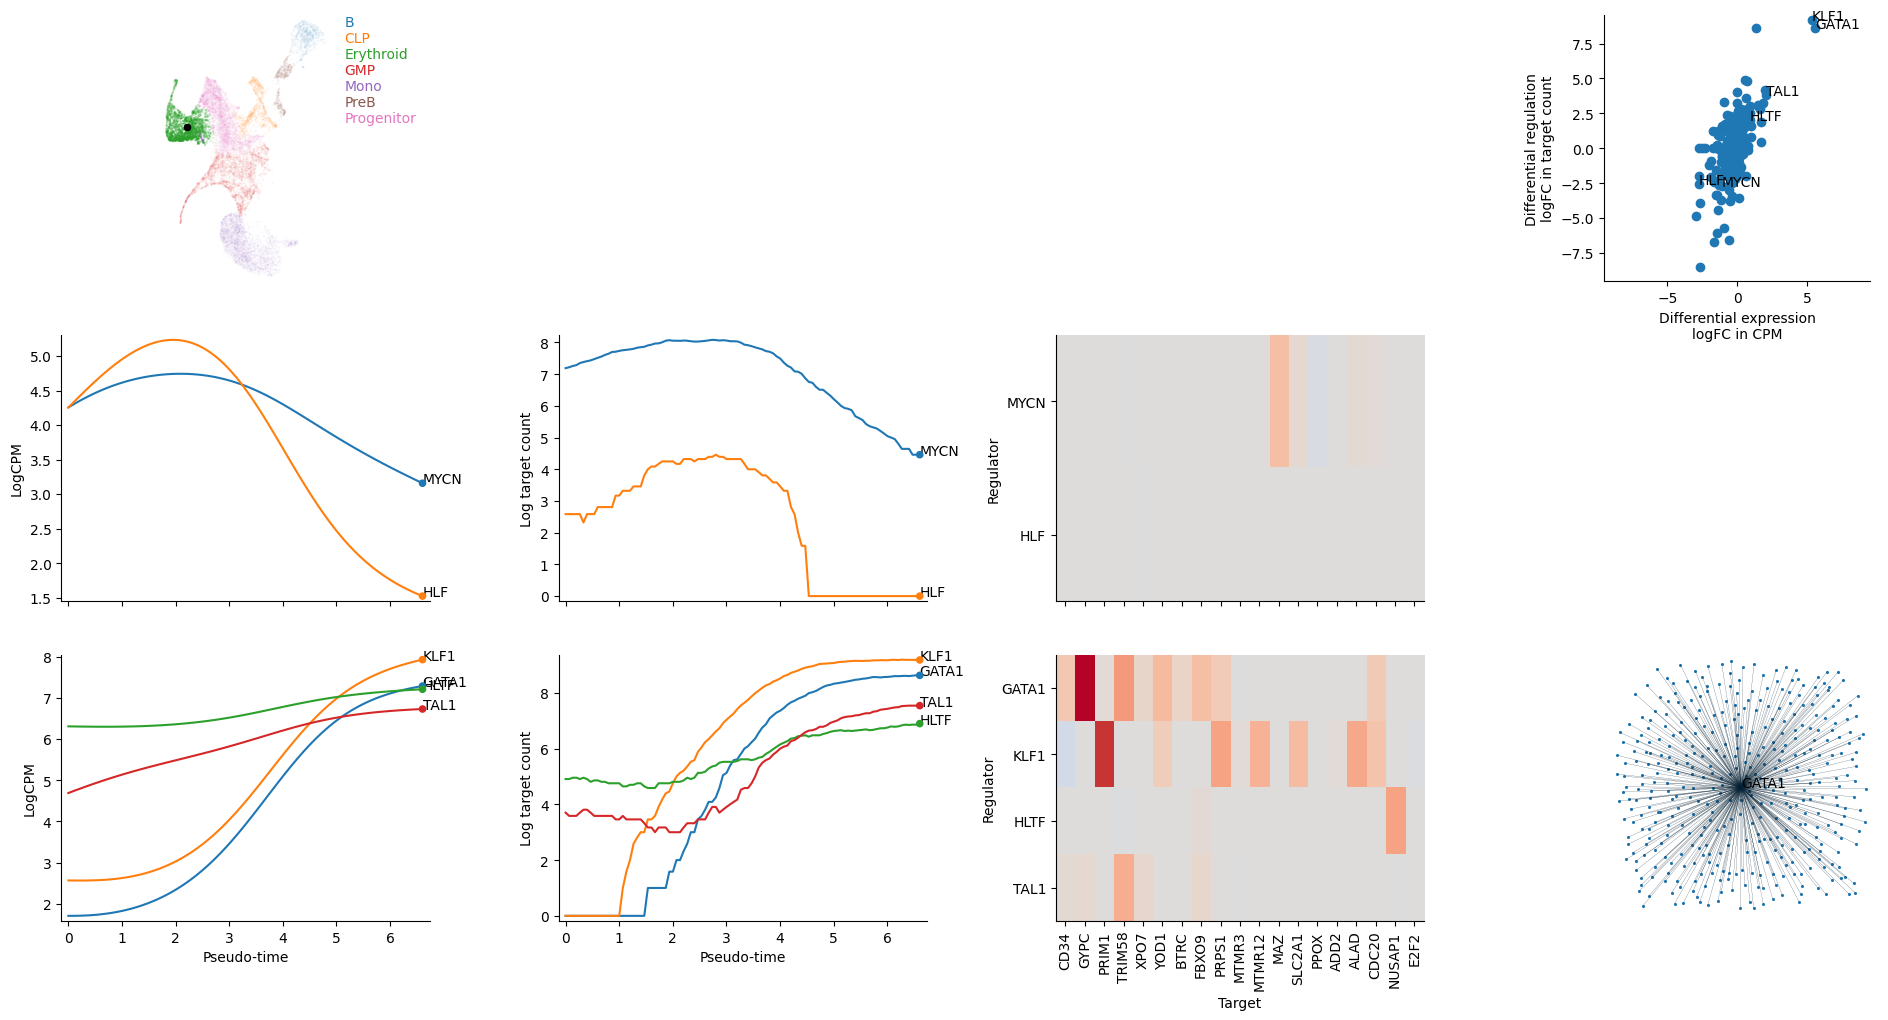

In [7]:
branch=branches[branchname]
# Draw dynamic network with notch layout
layout1=layout.notch(nframe=nframe,dpi=dpi)
pts,fig,panels,animate_ka=layout1.draw(
	d0,branch,
	# Set genes to annotate
	bcde_tfs=tfs_ann,e_targets=target_ann,f_tfs=tfs_subnet,
	# custom configurations for color range
	e_ka={'cmap':'coolwarm','lim':[-0.3,0.3]}
)
ca=panel.animate_generic(pts,fig,panels)
anim=ca.animate(**animate_ka)

# Saving animation
# Option 1: Visualize animation within jupyter. This will make the notebook large especially with many frames
# from IPython.display import HTML
# HTML(anim.to_jshtml())

# Option 2: Save animation to mp4 file
# If you receive a codec related error, try a different codec, e.g. with `codec='h264'`. You can list available codecs with `ffmpeg -codecs`.
w=matplotlib.animation.writers['ffmpeg_file'](fps=fps,codec='mpeg4')
w.frame_format='jpeg'
anim.save(f'../../output/animation-{branchname}.mp4',writer=w,dpi='figure')


### Monocyte branch
#### Branch dependent customizations

In [8]:
branchname='Monocyte'
# Select TFs for each row's dynamic subnetwork graph
tfs_subnet=[
	['MYCN'],
	['CEBPB'],
	['USF1'],
]
# Select TFs for each row's other plots
tfs_ann=[
	['HLF','MYCN'],
	['CEBPA','CEBPB','CEBPD','CEBPE','IRF8','KLF4'],
	['FOXO1', 'MAFB', 'USF1', 'JDP2'],
]
# Select genes to annotate as targets in all rows
target_ann=['MYB', 'SOX4', 'ATF3','CD34','IRF8','KLF4','HLA-DRA','CEBPA','CCR2','CSF1R','ITGAM','CTSS','CD14','TIMP2','LGALS2','FCGR3A','CD99','CTSK']


#### Branch independent lines

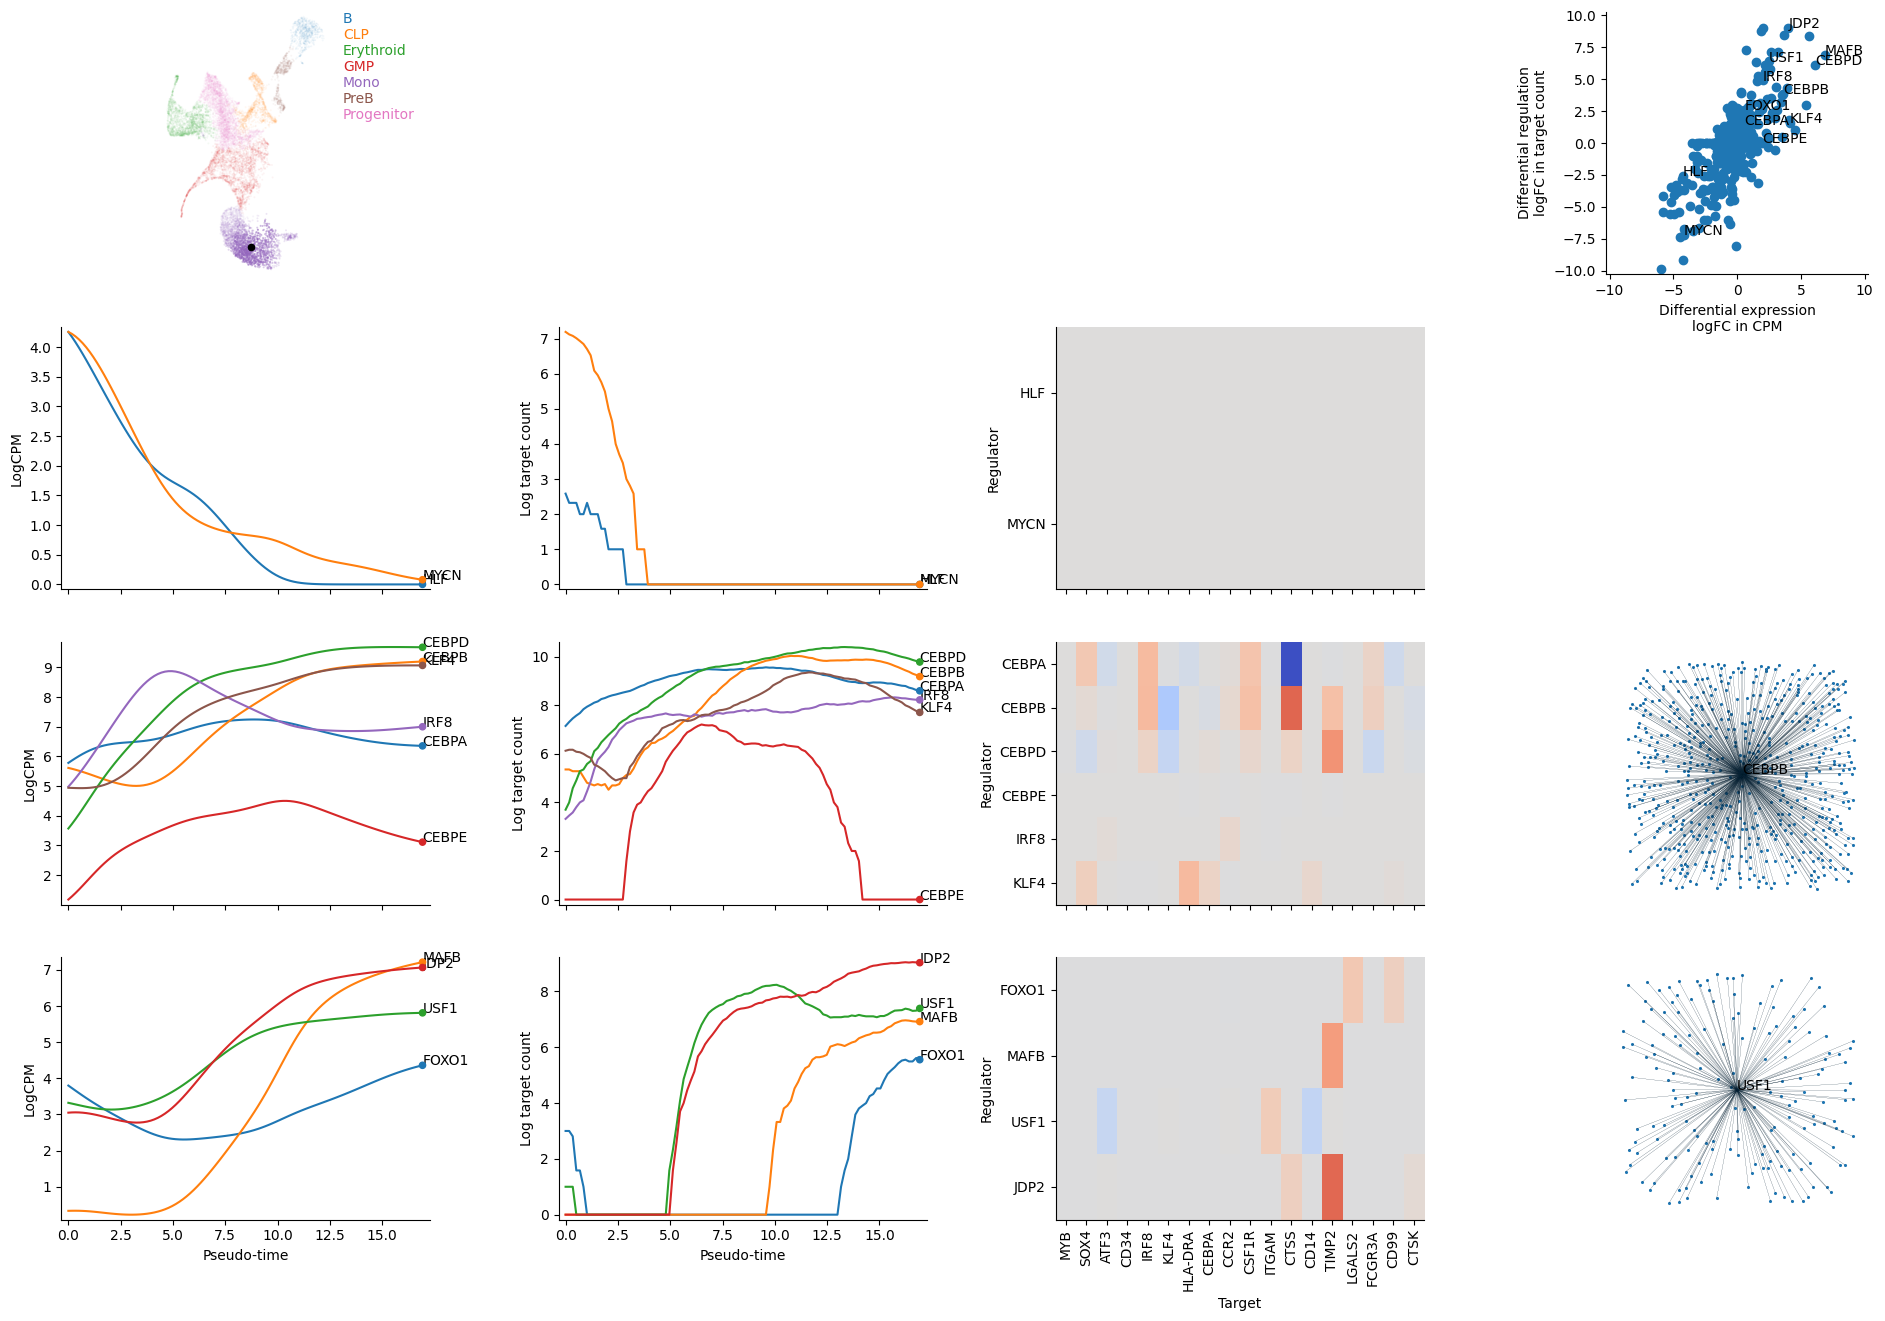

In [9]:
branch=branches[branchname]
# Draw dynamic network with notch layout
layout1=layout.notch(nframe=nframe,dpi=dpi)
pts,fig,panels,animate_ka=layout1.draw(
	d0,branch,
	# Set genes to annotate
	bcde_tfs=tfs_ann,e_targets=target_ann,f_tfs=tfs_subnet,
	# custom configurations for color range
	e_ka={'cmap':'coolwarm','lim':[-0.3,0.3]}
)
ca=panel.animate_generic(pts,fig,panels)
anim=ca.animate(**animate_ka)

# Save animation to mp4 file
w=matplotlib.animation.writers['ffmpeg_file'](fps=fps,codec='mpeg4')
w.frame_format='jpeg'
anim.save(f'../../output/animation-{branchname}.mp4',writer=w,dpi='figure')


### B cell branch
#### Branch dependent customizations

In [10]:
branchname='B'
# Select TFs for each row's dynamic subnetwork graph
tfs_subnet=[
	['MYCN'],
	['IKZF1'],
	['FOXM1'],
	['PAX5'],
]
# Select TFs for each row's other plots
tfs_ann=[
	['MYCN','HLF'],
	['IKZF1','TCF3','FOXO1'],
	['E2F2','FOXM1'],
	['EBF1','SPIB','IRF4','BACH2','PAX5','NFKB2','RELB'],
]
# Select genes to annotate as targets in all rows
target_ann=['ATF3','SOX4','MYB','CD34','RAG1','RAG2','E2F2','CCNB2','CCND3','MME','PIK3CA','MYO1C','PRKCB','SYK', 'SPIB', 'PAX5', 'CD79B']


#### Branch independent lines

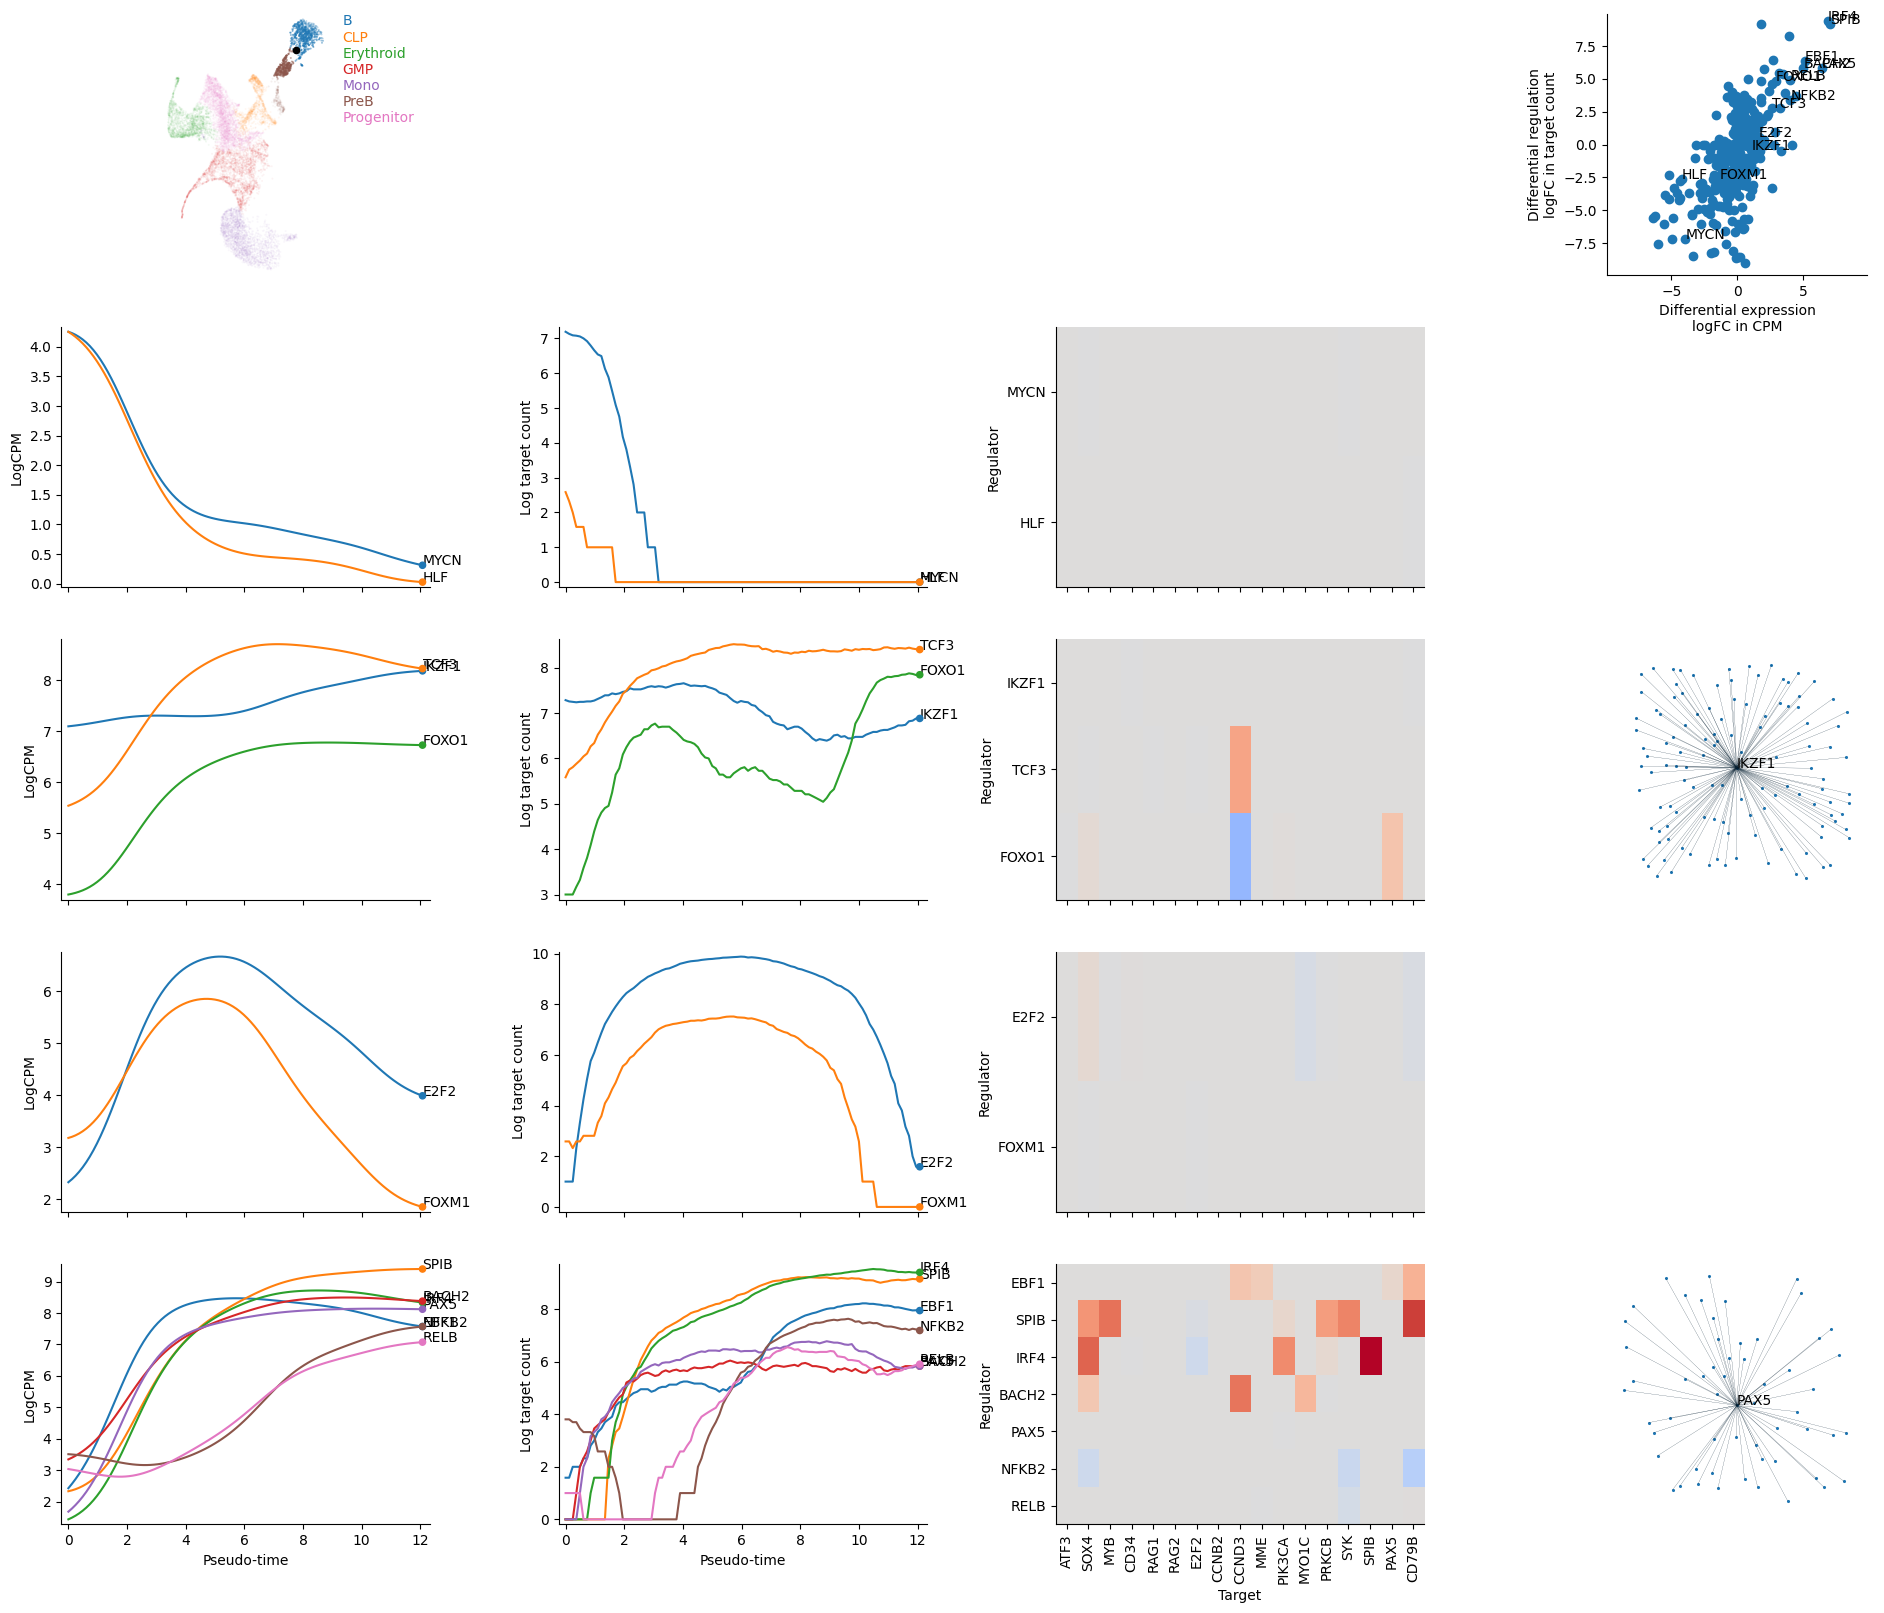

In [11]:
branch=branches[branchname]
# Draw dynamic network with notch layout
layout1=layout.notch(nframe=nframe,dpi=dpi)
pts,fig,panels,animate_ka=layout1.draw(
	d0,branch,
	# Set genes to annotate
	bcde_tfs=tfs_ann,e_targets=target_ann,f_tfs=tfs_subnet,
	# custom configurations for color range
	e_ka={'cmap':'coolwarm','lim':[-0.3,0.3]}
)
ca=panel.animate_generic(pts,fig,panels)
anim=ca.animate(**animate_ka)

# Save animation to mp4 file
w=matplotlib.animation.writers['ffmpeg_file'](fps=fps,codec='mpeg4')
w.frame_format='jpeg'
anim.save(f'../../output/animation-{branchname}.mp4',writer=w,dpi='figure')


## Export dynamic network to folder

In [12]:
branchname='Erythroid'
output_folder=f'../../output/export/{branchname}'

#Start/stop node ID on trajectory
start_node,stop_node=branches[branchname]
#Number of timepoints to export
n_timepoint=10
#Gaussian kernel smoothing distance
dist_smooth=1.5
#Choose which sparsities (proportion of positive edges) to export network
#Use None to export continuous network
sparsities=[None,0.01]

d0.export(output_folder,start_node,stop_node,n_timepoint,dist_smooth,sparsities=sparsities)
